In [1]:
import django
import pandas as pd
django.setup()

In [2]:
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

from sch.models import *
import datetime as dt
from django.db.models import CharField
from django.test import RequestFactory
from sch.actions import *
from sch.views2 import *

In [3]:
shift = Shift.objects.get(name='EP')
all_mi_slots = list(Slot.objects.filter(shift=shift).values_list('employee__name',flat=True))
print(
    "All EP Slots\n",
    all_mi_slots
)

mi_tallies = tally(all_mi_slots)
print (
    "\n======TALLIES======\n",
    sortDict(mi_tallies)
)

All EP Slots
 ['Sabrina', 'Elisia', 'David', 'Danica', 'Elisia', 'Trisha', 'Cheryl', 'David', 'David', 'David', 'Brianna A', 'David', 'Trisha', 'Josh', 'Elisia', 'Tiffany', 'Sabrina', 'Esperanza', 'Tiffany', 'Josh', 'Elisia', 'Sabrina', 'David', 'David', 'Mona', 'David', 'Trisha', 'Elisia', 'Josh', 'Elisia', 'David', 'Tiffany', 'Elisia', 'Trisha', 'Josh', 'Tiffany', 'David', 'David', 'Mona', 'Jaden', None, 'Elisia', 'Sabrina', 'Elisia', 'Josh', 'Danica', 'Cheryl', 'Cheryl', 'Cheryl', None, 'Cheryl', 'David', 'Brianna A', 'Cheryl', 'Elisia', 'Jaden', 'Elisia', 'Cheryl', 'Josh', 'Esperanza', 'Sabrina', 'Elisia', 'Tiffany', 'Sabrina', 'Elisia', 'Sabrina', 'Mona', 'Elisia', 'Elisia', 'Elisia', 'Josh', 'Elisia', 'Sabrina', 'David', 'David', 'David', 'Josh', 'Tiffany', 'Cheryl', 'Elisia', 'Mona', 'Elisia', 'Elisia', 'Elisia', 'Sabrina', 'Sabrina', 'Leslie', 'Josh', 'David', 'Sabrina', 'Cheryl', None, 'Sabrina', 'Elisia', 'Brianna A', 'Josh', 'Sabrina', 'Mona', 'Elisia', 'Elisia', 'David', 'E

In [4]:
df = pd.DataFrame.from_dict(sortDict(mi_tallies,reverse=True), orient='index', columns=['count'])
df

,count
Elisia,75
Sabrina,51
David,48
Josh,34
Cheryl,33
Tiffany,24
Mona,17
Trisha,16
Brianna A,8
Esperanza,8


array([<AxesSubplot:ylabel='count'>], dtype=object)

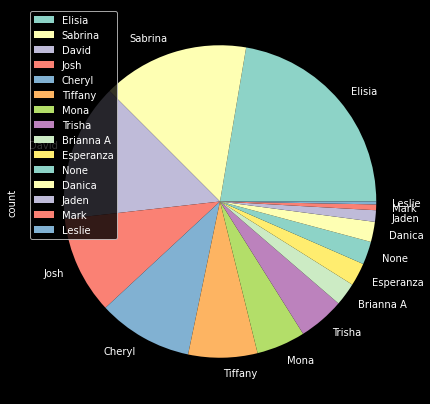

In [5]:
df.plot(kind='pie',subplots=True,figsize=(7,10))

In [16]:
sch = Schedule.objects.first()

empls = Employee.objects.annotate(scheduleHours=Sum('slots__shift__hours')).order_by('-scheduleHours')
# standard schedule Hours should be 240 * the employees fte field
empls = empls.annotate(standardScheduleHours=240*F('fte'))
empls = empls.annotate(percentScheduled=F('scheduleHours')/F('standardScheduleHours')*100)
empls.values('name','scheduleHours','standardScheduleHours','percentScheduled')

<EmployeeManager [{'name': 'Elisia', 'scheduleHours': 2240.0, 'standardScheduleHours': 240.0, 'percentScheduled': 933.3333333333334}, {'name': 'Jaden', 'scheduleHours': 2210.0, 'standardScheduleHours': 240.0, 'percentScheduled': 920.8333333333334}, {'name': 'David', 'scheduleHours': 2030.0, 'standardScheduleHours': 240.0, 'percentScheduled': 845.8333333333334}, {'name': 'Brittanie', 'scheduleHours': 1872.0, 'standardScheduleHours': 240.0, 'percentScheduled': 780.0}, {'name': 'Brianna A', 'scheduleHours': 1860.0, 'standardScheduleHours': 240.0, 'percentScheduled': 775.0}, {'name': 'Mona', 'scheduleHours': 1860.0, 'standardScheduleHours': 240.0, 'percentScheduled': 775.0}, {'name': 'Cheryl', 'scheduleHours': 1820.0, 'standardScheduleHours': 240.0, 'percentScheduled': 758.3333333333333}, {'name': 'Esperanza', 'scheduleHours': 1820.0, 'standardScheduleHours': 240.0, 'percentScheduled': 758.3333333333333}, {'name': 'Danica', 'scheduleHours': 1730.0, 'standardScheduleHours': 240.0, 'percentS